# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
# 超參數設定
LEARNING_RATE = [1e-2, 1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]


In [7]:
results = {}

import itertools
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.5f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "EXP-LR-%s-Optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.01000, Optimizer = <class 'keras.src.optimizers.sgd.SGD'>
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_______

Epoch 1/50



196/196 [==============================] - 2s 10ms/step - loss: 2.0762 - accuracy: 0.2645 - val_loss: 1.9400 - val_accuracy: 0.3084
Epoch 2/50
196/196 [==============================] - 4s 21ms/step - loss: 1.8884 - accuracy: 0.3340 - val_loss: 1.9291 - val_accuracy: 0.3190
Epoch 3/50
196/196 [==============================] - 5s 26ms/step - loss: 1.8253 - accuracy: 0.3563 - val_loss: 1.8299 - val_accuracy: 0.3558
Epoch 4/50
196/196 [==============================] - 5s 24ms/step - loss: 1.7805 - accuracy: 0.3726 - val_loss: 1.7544 - val_accuracy: 0.3842
Epoch 5/50
196/196 [==============================] - 4s 22ms/step - loss: 1.7409 - accuracy: 0.3874 - val_loss: 1.7239 - val_accuracy: 0.3864
Epoch 6/50
196/196 [==============================] - 5s 26ms/step - loss: 1.7083 - accuracy: 0.3984 - val_loss: 1.6972 - val_accuracy: 0.4038
Epoch 7/50
196/196 [==============================] - 5s 27ms/step - loss: 1.6814 - accuracy: 0.4094 - val_loss: 1.7861 - val_accuracy: 0.3736
Epoch 8/50

Epoch 1/50
196/196 [==============================] - 3s 11ms/step - loss: 2.2276 - accuracy: 0.2122 - val_loss: 1.9128 - val_accuracy: 0.3042
Epoch 2/50
196/196 [==============================] - 2s 9ms/step - loss: 1.8860 - accuracy: 0.3171 - val_loss: 1.7684 - val_accuracy: 0.3587
Epoch 3/50
196/196 [==============================] - 2s 9ms/step - loss: 1.7876 - accuracy: 0.3546 - val_loss: 1.8848 - val_accuracy: 0.3228
Epoch 4/50
196/196 [==============================] - 2s 9ms/step - loss: 1.7252 - accuracy: 0.3815 - val_loss: 1.7174 - val_accuracy: 0.3693
Epoch 5/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6657 - accuracy: 0.4053 - val_loss: 1.6403 - val_accuracy: 0.4099
Epoch 6/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6146 - accuracy: 0.4210 - val_loss: 1.5960 - val_accuracy: 0.4362
Epoch 7/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5706 - accuracy: 0.4390 - val_loss: 1.7109 - val_accuracy: 0.3844
Ep

Epoch 1/50
196/196 [==============================] - 5s 26ms/step - loss: 2.2048 - accuracy: 0.2043 - val_loss: 2.1152 - val_accuracy: 0.2691
Epoch 2/50
196/196 [==============================] - 5s 26ms/step - loss: 2.0525 - accuracy: 0.2938 - val_loss: 2.0019 - val_accuracy: 0.3027
Epoch 3/50
196/196 [==============================] - 5s 27ms/step - loss: 1.9614 - accuracy: 0.3210 - val_loss: 1.9310 - val_accuracy: 0.3284
Epoch 4/50
196/196 [==============================] - 5s 26ms/step - loss: 1.9036 - accuracy: 0.3389 - val_loss: 1.8841 - val_accuracy: 0.3414
Epoch 5/50
196/196 [==============================] - 5s 27ms/step - loss: 1.8646 - accuracy: 0.3504 - val_loss: 1.8523 - val_accuracy: 0.3527
Epoch 6/50
196/196 [==============================] - 5s 27ms/step - loss: 1.8373 - accuracy: 0.3587 - val_loss: 1.8278 - val_accuracy: 0.3595
Epoch 7/50
196/196 [==============================] - 6s 29ms/step - loss: 1.8148 - accuracy: 0.3670 - val_loss: 1.8115 - val_accuracy: 0.3675

Epoch 1/50
196/196 [==============================] - 7s 31ms/step - loss: 1.9346 - accuracy: 0.3004 - val_loss: 1.8029 - val_accuracy: 0.3500
Epoch 2/50
196/196 [==============================] - 6s 29ms/step - loss: 1.7090 - accuracy: 0.3894 - val_loss: 1.6827 - val_accuracy: 0.4073
Epoch 3/50
196/196 [==============================] - 5s 27ms/step - loss: 1.6188 - accuracy: 0.4233 - val_loss: 1.6374 - val_accuracy: 0.4195
Epoch 4/50
196/196 [==============================] - 6s 28ms/step - loss: 1.5544 - accuracy: 0.4468 - val_loss: 1.5464 - val_accuracy: 0.4477
Epoch 5/50
196/196 [==============================] - 6s 28ms/step - loss: 1.5136 - accuracy: 0.4602 - val_loss: 1.5225 - val_accuracy: 0.4626
Epoch 6/50
196/196 [==============================] - 5s 24ms/step - loss: 1.4699 - accuracy: 0.4759 - val_loss: 1.5187 - val_accuracy: 0.4615
Epoch 7/50
196/196 [==============================] - 5s 24ms/step - loss: 1.4368 - accuracy: 0.4884 - val_loss: 1.4880 - val_accuracy: 0.4690

Epoch 1/50
196/196 [==============================] - 4s 19ms/step - loss: 2.0570 - accuracy: 0.2753 - val_loss: 1.9370 - val_accuracy: 0.3200
Epoch 2/50
196/196 [==============================] - 3s 17ms/step - loss: 1.8723 - accuracy: 0.3429 - val_loss: 1.8519 - val_accuracy: 0.3394
Epoch 3/50
196/196 [==============================] - 4s 20ms/step - loss: 1.8057 - accuracy: 0.3659 - val_loss: 1.7812 - val_accuracy: 0.3696
Epoch 4/50
196/196 [==============================] - 5s 27ms/step - loss: 1.7548 - accuracy: 0.3820 - val_loss: 1.7772 - val_accuracy: 0.3675
Epoch 5/50
196/196 [==============================] - 5s 28ms/step - loss: 1.7160 - accuracy: 0.3947 - val_loss: 1.7132 - val_accuracy: 0.3948
Epoch 6/50
196/196 [==============================] - 4s 23ms/step - loss: 1.6930 - accuracy: 0.4057 - val_loss: 1.7017 - val_accuracy: 0.3936
Epoch 7/50
196/196 [==============================] - 5s 27ms/step - loss: 1.6659 - accuracy: 0.4162 - val_loss: 1.6832 - val_accuracy: 0.3985

Epoch 1/50
196/196 [==============================] - 2s 11ms/step - loss: 2.1657 - accuracy: 0.2219 - val_loss: 1.9013 - val_accuracy: 0.2995
Epoch 2/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8740 - accuracy: 0.3216 - val_loss: 1.9099 - val_accuracy: 0.3175
Epoch 3/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7836 - accuracy: 0.3580 - val_loss: 1.7058 - val_accuracy: 0.3821
Epoch 4/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7081 - accuracy: 0.3886 - val_loss: 1.8982 - val_accuracy: 0.3155
Epoch 5/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6551 - accuracy: 0.4098 - val_loss: 1.7022 - val_accuracy: 0.3959
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6053 - accuracy: 0.4234 - val_loss: 1.7486 - val_accuracy: 0.3763
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5699 - accuracy: 0.4366 - val_loss: 1.6554 - val_accuracy: 0.4037

Epoch 1/50
196/196 [==============================] - 2s 10ms/step - loss: 2.1969 - accuracy: 0.2133 - val_loss: 2.0973 - val_accuracy: 0.2787
Epoch 2/50
196/196 [==============================] - 2s 9ms/step - loss: 2.0354 - accuracy: 0.2984 - val_loss: 1.9852 - val_accuracy: 0.3092
Epoch 3/50
196/196 [==============================] - 2s 9ms/step - loss: 1.9500 - accuracy: 0.3268 - val_loss: 1.9213 - val_accuracy: 0.3344
Epoch 4/50
196/196 [==============================] - 2s 9ms/step - loss: 1.8998 - accuracy: 0.3422 - val_loss: 1.8867 - val_accuracy: 0.3468
Epoch 5/50
196/196 [==============================] - 2s 9ms/step - loss: 1.8659 - accuracy: 0.3514 - val_loss: 1.8587 - val_accuracy: 0.3539
Epoch 6/50
196/196 [==============================] - 2s 9ms/step - loss: 1.8391 - accuracy: 0.3598 - val_loss: 1.8346 - val_accuracy: 0.3606
Epoch 7/50
196/196 [==============================] - 2s 9ms/step - loss: 1.8173 - accuracy: 0.3676 - val_loss: 1.8237 - val_accuracy: 0.3541
Epoch

Epoch 1/50
196/196 [==============================] - 3s 12ms/step - loss: 1.9324 - accuracy: 0.3037 - val_loss: 1.7355 - val_accuracy: 0.3793
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 1.7075 - accuracy: 0.3905 - val_loss: 1.6781 - val_accuracy: 0.3971
Epoch 3/50
196/196 [==============================] - 2s 10ms/step - loss: 1.6143 - accuracy: 0.4230 - val_loss: 1.6496 - val_accuracy: 0.4140
Epoch 4/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5446 - accuracy: 0.4504 - val_loss: 1.5175 - val_accuracy: 0.4592
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4988 - accuracy: 0.4666 - val_loss: 1.5249 - val_accuracy: 0.4530
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4653 - accuracy: 0.4787 - val_loss: 1.5195 - val_accuracy: 0.4592
Epoch 7/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4403 - accuracy: 0.4902 - val_loss: 1.4644 - val_accuracy: 0.4808

Epoch 1/50
196/196 [==============================] - 4s 10ms/step - loss: 2.0662 - accuracy: 0.2624 - val_loss: 1.9599 - val_accuracy: 0.3114
Epoch 2/50
196/196 [==============================] - 2s 9ms/step - loss: 1.8986 - accuracy: 0.3296 - val_loss: 1.8732 - val_accuracy: 0.3232
Epoch 3/50
196/196 [==============================] - 2s 9ms/step - loss: 1.8269 - accuracy: 0.3561 - val_loss: 1.8301 - val_accuracy: 0.3585
Epoch 4/50
196/196 [==============================] - 2s 9ms/step - loss: 1.7781 - accuracy: 0.3750 - val_loss: 1.9016 - val_accuracy: 0.3360
Epoch 5/50
196/196 [==============================] - 2s 8ms/step - loss: 1.7438 - accuracy: 0.3870 - val_loss: 1.7893 - val_accuracy: 0.3577
Epoch 6/50
196/196 [==============================] - 2s 8ms/step - loss: 1.7140 - accuracy: 0.3973 - val_loss: 1.6877 - val_accuracy: 0.4042
Epoch 7/50
196/196 [==============================] - 2s 8ms/step - loss: 1.6806 - accuracy: 0.4080 - val_loss: 1.6678 - val_accuracy: 0.4086
Epoch

Epoch 1/50
196/196 [==============================] - 3s 11ms/step - loss: 2.1760 - accuracy: 0.2233 - val_loss: 1.9106 - val_accuracy: 0.3074
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 1.8713 - accuracy: 0.3267 - val_loss: 2.1299 - val_accuracy: 0.2853
Epoch 3/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7767 - accuracy: 0.3630 - val_loss: 1.7186 - val_accuracy: 0.3880
Epoch 4/50
196/196 [==============================] - 2s 10ms/step - loss: 1.7052 - accuracy: 0.3888 - val_loss: 1.6648 - val_accuracy: 0.3991
Epoch 5/50
196/196 [==============================] - 4s 21ms/step - loss: 1.6507 - accuracy: 0.4096 - val_loss: 1.6649 - val_accuracy: 0.4106
Epoch 6/50
196/196 [==============================] - 6s 29ms/step - loss: 1.6045 - accuracy: 0.4251 - val_loss: 1.6511 - val_accuracy: 0.4124
Epoch 7/50
196/196 [==============================] - 6s 28ms/step - loss: 1.5628 - accuracy: 0.4419 - val_loss: 1.6605 - val_accuracy: 0.4080

Epoch 1/50
196/196 [==============================] - 6s 27ms/step - loss: 2.1961 - accuracy: 0.2047 - val_loss: 2.1029 - val_accuracy: 0.2586
Epoch 2/50
196/196 [==============================] - 5s 26ms/step - loss: 2.0420 - accuracy: 0.2850 - val_loss: 1.9994 - val_accuracy: 0.2938
Epoch 3/50
196/196 [==============================] - 4s 21ms/step - loss: 1.9613 - accuracy: 0.3143 - val_loss: 1.9336 - val_accuracy: 0.3239
Epoch 4/50
196/196 [==============================] - 5s 24ms/step - loss: 1.9102 - accuracy: 0.3329 - val_loss: 1.8964 - val_accuracy: 0.3311
Epoch 5/50
196/196 [==============================] - 4s 21ms/step - loss: 1.8740 - accuracy: 0.3455 - val_loss: 1.8665 - val_accuracy: 0.3518
Epoch 6/50
196/196 [==============================] - 5s 24ms/step - loss: 1.8461 - accuracy: 0.3561 - val_loss: 1.8357 - val_accuracy: 0.3550
Epoch 7/50
196/196 [==============================] - 5s 23ms/step - loss: 1.8240 - accuracy: 0.3636 - val_loss: 1.8172 - val_accuracy: 0.3629

Epoch 1/50
196/196 [==============================] - 5s 23ms/step - loss: 1.9422 - accuracy: 0.3004 - val_loss: 1.7662 - val_accuracy: 0.3701
Epoch 2/50
196/196 [==============================] - 4s 21ms/step - loss: 1.7179 - accuracy: 0.3864 - val_loss: 1.6883 - val_accuracy: 0.3980
Epoch 3/50
196/196 [==============================] - 4s 22ms/step - loss: 1.6220 - accuracy: 0.4223 - val_loss: 1.5949 - val_accuracy: 0.4324
Epoch 4/50
196/196 [==============================] - 4s 22ms/step - loss: 1.5566 - accuracy: 0.4454 - val_loss: 1.6225 - val_accuracy: 0.4241
Epoch 5/50
196/196 [==============================] - 4s 22ms/step - loss: 1.5107 - accuracy: 0.4623 - val_loss: 1.5223 - val_accuracy: 0.4611
Epoch 6/50
196/196 [==============================] - 4s 21ms/step - loss: 1.4791 - accuracy: 0.4738 - val_loss: 1.4975 - val_accuracy: 0.4675
Epoch 7/50
196/196 [==============================] - 4s 21ms/step - loss: 1.4367 - accuracy: 0.4861 - val_loss: 1.4741 - val_accuracy: 0.4790

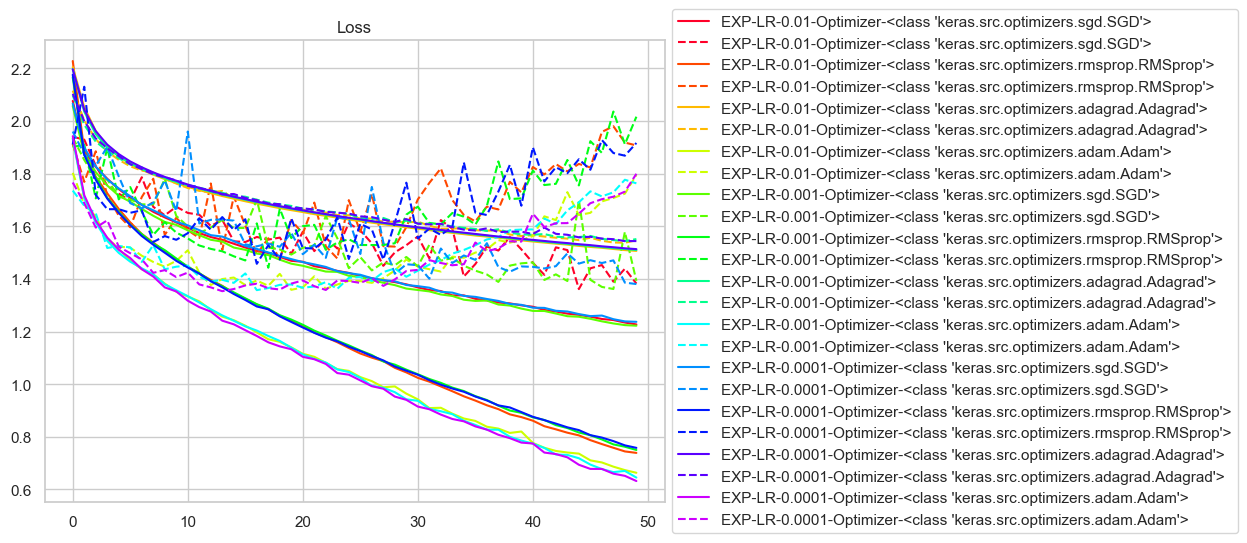

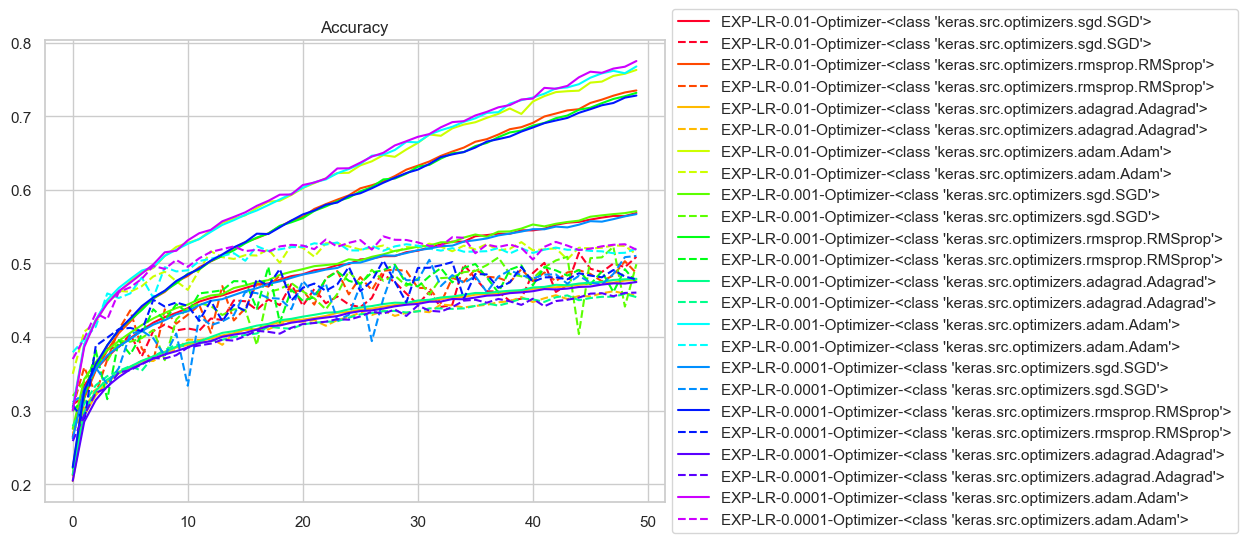

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()